<a href="https://colab.research.google.com/github/Aishik122/TCS_stockprice/blob/main/Stock_market_TCS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market


libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense,Bidirectional, Lambda,Dropout,Flatten

In [8]:
df = pd.read_csv('/content/tcs.csv')


In [9]:
df.isna().sum()
df.fillna(method='Pad',inplace=True)

In [10]:
data = df[['Date', 'Open']]

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-11-1a72a8b5b870>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3485 non-null   object 
 1   Open    3485 non-null   float64
dtypes: float64(1), object(1)
memory usage: 54.6+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3485 non-null   datetime64[ns]
 1   Open    3485 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.6 KB


In [14]:
data.sort_values('Date',inplace=True)

In [15]:
data.set_index('Date', inplace=True)

In [16]:
data.head()

,Open
Date,
2010-01-02,367.174988
2010-01-04,393.174988
2010-01-06,371.524994
2010-01-07,375.000000
2010-01-09,421.000000


In [17]:
scaler = MinMaxScaler()
data['Open'] = scaler.fit_transform(data[['Open']])

In [18]:
sequence_length = 40
sequences = []
targets = []

In [19]:
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length].values)
    targets.append(data.iloc[i + sequence_length].values)

In [20]:
sequences = np.array(sequences)
targets = np.array(targets)

In [21]:
print(f' sequence length is  {len(sequences)}')


 sequence length is  3445


In [22]:
# train_test_split
train_size = int(0.8 * len(sequences))
train_sequences, test_sequences = sequences[:train_size], sequences[train_size:]
train_targets, test_targets = targets[:train_size], targets[train_size:]

In [23]:
# model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu')))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Lambda(lambda x:x*2.0))
model.add(Dense(units=10))
model.add(Dense(units=30))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 bidirectional (Bidirection  (None, 38, 100)           46000     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [25]:
# Reshape sequences for model training
train_sequences = train_sequences.reshape((train_sequences.shape[0], train_sequences.shape[1], 1))
test_sequences = test_sequences.reshape((test_sequences.shape[0], test_sequences.shape[1], 1))

In [26]:
train_sequences

array([[[0.00412145],
        [0.01118293],
        [0.0053029 ],
        ...,
        [0.00856883],
        [0.0054319 ],
        [0.00882684]],

       [[0.01118293],
        [0.0053029 ],
        [0.00624669],
        ...,
        [0.0054319 ],
        [0.00882684],
        [0.00777441]],

       [[0.0053029 ],
        [0.00624669],
        [0.01874007],
        ...,
        [0.00882684],
        [0.00777441],
        [0.00760467]],

       ...,

       [[0.73683783],
        [0.73493666],
        [0.74525728],
        ...,
        [0.78137944],
        [0.76508373],
        [0.78029306]],

       [[0.73493666],
        [0.74525728],
        [0.71103628],
        ...,
        [0.76508373],
        [0.78029306],
        [0.75938023]],

       [[0.74525728],
        [0.71103628],
        [0.71157947],
        ...,
        [0.78029306],
        [0.75938023],
        [0.74770164]]])

In [27]:
model.fit(train_sequences, train_targets, epochs=50, batch_size=10)

Epoch 1/50
276/276 [==============================] - 60s 184ms/step - loss: 0.0053
Epoch 2/50
276/276 [==============================] - 58s 211ms/step - loss: 0.0029
Epoch 3/50
276/276 [==============================] - 51s 184ms/step - loss: 0.0027
Epoch 4/50
276/276 [==============================] - 51s 186ms/step - loss: 0.0025
Epoch 5/50
276/276 [==============================] - 50s 181ms/step - loss: 0.0023
Epoch 6/50
276/276 [==============================] - 50s 181ms/step - loss: 0.0023
Epoch 7/50
276/276 [==============================] - 50s 181ms/step - loss: 0.0021
Epoch 8/50
276/276 [==============================] - 52s 187ms/step - loss: 0.0023
Epoch 9/50
276/276 [==============================] - 50s 182ms/step - loss: 0.0018
Epoch 10/50
276/276 [==============================] - 50s 183ms/step - loss: 0.0019
Epoch 11/50
276/276 [==============================] - 50s 182ms/step - loss: 0.0020
Epoch 12/50
276/276 [==============================] - 50s 182ms/step - lo

In [28]:
# Evaluate the model
test_loss = model.evaluate(test_sequences, test_targets)
print(f'MSE Accuracy : {test_loss}')

22/22 [==============================] - 1s 23ms/step - loss: 0.0015
MSE Accuracy : 0.0014834796311333776


In [29]:
predictions = model.predict(test_sequences)

22/22 [==============================] - 1s 22ms/step


In [30]:
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(test_targets)

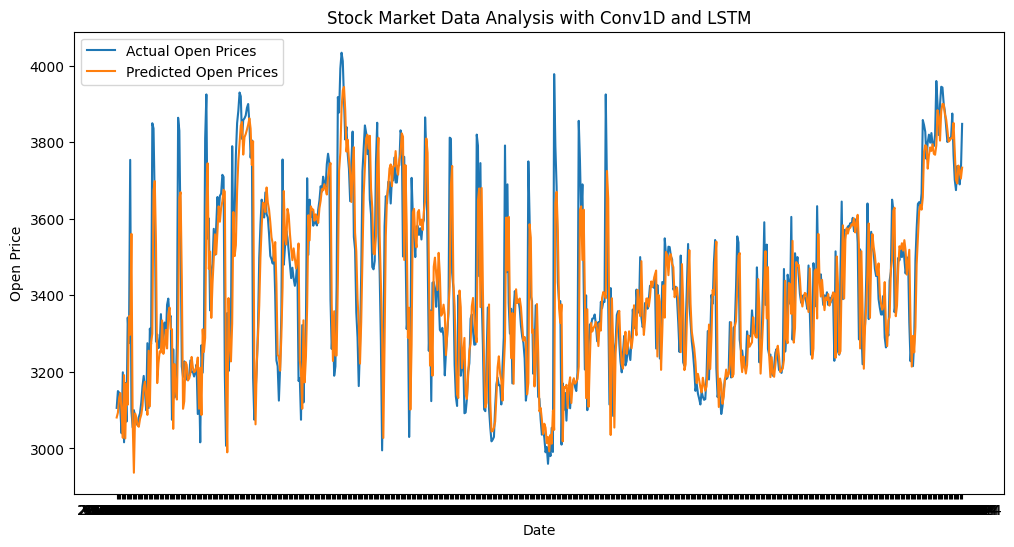

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values[-len(predictions):], actual_values, label='Actual Open Prices')
plt.plot(df['Date'].values[-len(predictions):], predictions, label='Predicted Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Stock Market Data Analysis with Conv1D and LSTM')
plt.legend()
plt.show()

1/1 [==============================] - 0s 37ms/step


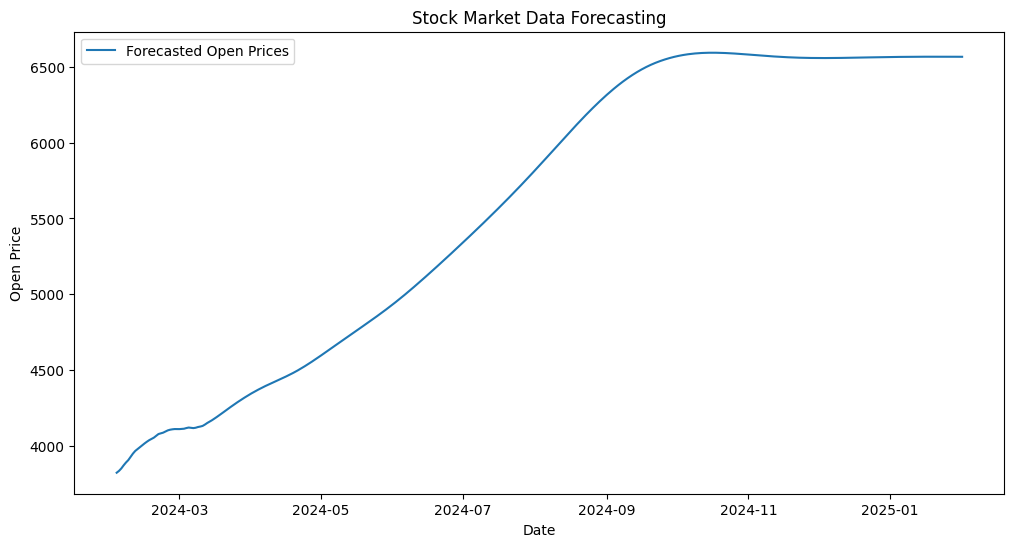

In [37]:
# Future forecast open price

future_days = 365  # Adjust this based on your preference

# Generate sequences for forecasting
last_sequence = data['Open'].values[-sequence_length:]
forecast_sequences = [last_sequence]

for _ in range(future_days):
    # Reshape and predict the next value
    input_sequence = np.array(forecast_sequences[-1])  # Take the last sequence
    input_sequence = input_sequence.reshape((1, sequence_length, 1))
    forecast_value = model.predict(input_sequence)[0, 0]  # Extracting the scalar value

    # Append the forecasted value to the sequences
    last_sequence = np.append(last_sequence[1:], forecast_value)
    forecast_sequences.append(last_sequence)

# Inverse transform  to the original scale
forecast_sequences = np.array(forecast_sequences)
forecast_sequences = scaler.inverse_transform(forecast_sequences)

# Get the last date in the original dataset
last_date = pd.to_datetime(df['Date'].iloc[-1])

# Generate future date range for plotting
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=future_days)

# Plot the forecasted values only
plt.figure(figsize=(12, 6))
plt.plot(future_dates, forecast_sequences[1:, -1], label='Forecasted Open Prices', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Stock Market Data Forecasting')
plt.legend()
plt.show()

In [39]:
future_dates
x=list(future_dates)
y=[]
for i in x :
  #print(i.date())
  y.append(i.date())
# print(x)

In [40]:
forecast_sequences[1:, -1]

array([3824.27814314, 3836.30615965, 3852.48506754, 3873.01457662,
       3891.51319065, 3907.39780091, 3928.4616983 , 3950.34681995,
       3967.92237967, 3980.37242029, 3991.99750582, 4005.56021532,
       4017.24521379, 4028.50182376, 4038.83296535, 4047.17425115,
       4055.35050205, 4066.96966212, 4079.31699485, 4083.49509943,
       4088.31578677, 4096.02282936, 4103.35327634, 4107.80263512,
       4110.44099909, 4112.13041233, 4111.85784137, 4111.78980836,
       4113.1149158 , 4114.31141891, 4118.68352731, 4122.11282988,
       4120.51383471, 4118.3499461 , 4120.68589238, 4125.46619883,
       4128.58957232, 4132.75450923, 4141.71774842, 4152.15532875,
       4160.71563695, 4169.96856508, 4179.99575274, 4190.50048823,
       4201.22424612, 4212.17404916, 4223.41178546, 4234.75354642,
       4245.95660783, 4256.93581869, 4267.77940246, 4278.47858068,
       4288.96751495, 4299.24006037, 4309.25013005, 4318.95822095,
       4328.45211761, 4337.84418421, 4346.93295527, 4355.59597

In [41]:
z=forecast_sequences[1:,-1]
z=list(z)
#print(z)

In [42]:
pd.DataFrame({'future_date':y,'forecast_value':z})

,future_date,forecast_value
0,2024-02-03,3824.278143
1,2024-02-04,3836.306160
2,2024-02-05,3852.485068
3,2024-02-06,3873.014577
4,2024-02-07,3891.513191
...,...,...
360,2025-01-28,6566.176288
361,2025-01-29,6566.122740
362,2025-01-30,6566.064363
363,2025-01-31,6566.002475
